In [1]:
import pandas as pd
import numpy as np
import uproot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150


In [46]:
dataframes = {}

sb_masses = [300,500,700,1000]

mpoints = []

count=0
minevents = 99999
for sb_mass in sb_masses:
    tag = ""
    if sb_mass==300: start_chi_mass = 200
    elif sb_mass==700: start_chi_mass = 400
    else: start_chi_mass = 0
    
    if sb_mass==300 or sb_mass==700: chi_mass_step = 50
    elif sb_mass==500 or sb_mass==1000: 
        chi_mass_step = 100
        tag="_more"
    
    if not (start_chi_mass==0): chi_masses = [200 + i*50 for i in range(int((sb_mass-start_chi_mass)/chi_mass_step))]
    else: chi_masses = [sb_mass - 10 - i*chi_mass_step for i in range(int((sb_mass-start_chi_mass)/chi_mass_step))]
    
    for chi_mass in chi_masses:
        if sb_mass==300 or sb_mass==700: slep_masses = [chi_mass - 10 - i*20 for i in range(4)]
        elif sb_mass==500 or sb_mass==1000: slep_masses = [chi_mass - 10 - i*100 for i in range(100) if (chi_mass -10 -i*100)>0]
        
        for slep_mass in slep_masses:
            
            tmp = uproot.open("plots_RPV_full.root:hww2l2v_13TeV_incl/testtree/tree_RPV"+tag+"_sb"+str(sb_mass)+"_chi"+str(chi_mass)+"_sl"+str(slep_mass)).arrays(library="pd")
            if len(tmp) < 6000: 
                print("sb"+str(sb_mass)+"_chi"+str(chi_mass)+"_sl"+str(slep_mass), "-->", len(tmp) , " DISCARD")
                continue
            else:
                tmp['GEN_pole_msb'] = sb_mass
                tmp['GEN_pole_mchi'] = chi_mass
                tmp['GEN_pole_mslep'] = slep_mass
                dataframes["sb"+str(sb_mass)+"_chi"+str(chi_mass)+"_sl"+str(slep_mass)] = tmp
                minevents = min(len(tmp),minevents)
                print("sb"+str(sb_mass)+"_chi"+str(chi_mass)+"_sl"+str(slep_mass), "-->", len(tmp) , " KEEP")
                count+=1

print(minevents, count)

top = uproot.open("plots_RPV_top.root:hww2l2v_13TeV_incl/testtree/tree_top").arrays(library="pd")
top = shuffle(top,n_samples=minevents*count, random_state = 42)
top['GEN_pole_msb'] = 1.#np.random.uniform(0,1000,minevents*count)
top['GEN_pole_mchi'] = 1.#np.random.uniform(0,1000,minevents*count)
top['GEN_pole_mslep'] = 1#.np.random.uniform(0,1000,minevents*count)

dataframes['top'] = top

sb300_chi200_sl190 --> 882  DISCARD
sb300_chi200_sl170 --> 7424  KEEP
sb300_chi200_sl150 --> 8573  KEEP
sb300_chi200_sl130 --> 9054  KEEP
sb300_chi250_sl240 --> 382  DISCARD
sb300_chi250_sl220 --> 5890  DISCARD
sb300_chi250_sl200 --> 7443  KEEP
sb300_chi250_sl180 --> 7484  KEEP
sb500_chi490_sl480 --> 26  DISCARD
sb500_chi490_sl380 --> 430  DISCARD
sb500_chi490_sl280 --> 410  DISCARD
sb500_chi490_sl180 --> 385  DISCARD
sb500_chi490_sl80 --> 348  DISCARD
sb500_chi390_sl380 --> 357  DISCARD
sb500_chi390_sl280 --> 5679  DISCARD
sb500_chi390_sl180 --> 5590  DISCARD
sb500_chi390_sl80 --> 5005  DISCARD
sb500_chi290_sl280 --> 857  DISCARD
sb500_chi290_sl180 --> 5721  DISCARD
sb500_chi290_sl80 --> 5313  DISCARD
sb500_chi190_sl180 --> 1581  DISCARD
sb500_chi190_sl80 --> 5152  DISCARD
sb500_chi90_sl80 --> 2862  DISCARD
sb700_chi200_sl190 --> 5696  DISCARD
sb700_chi200_sl170 --> 12484  KEEP
sb700_chi200_sl150 --> 14015  KEEP
sb700_chi200_sl130 --> 14528  KEEP
sb700_chi250_sl240 --> 4790  DISCARD
s

In [47]:
sample_list = []
for k in dataframes.keys():
    sample_list.append(k)
    if k=='top': dataframes[k] = shuffle(dataframes[k],n_samples=minevents*count, random_state = 42)
    else: dataframes[k] = shuffle(dataframes[k],n_samples=minevents, random_state = 42)
    dataframes[k][k] = 1

In [48]:
df = pd.concat(dataframes[k] for k in dataframes.keys()).fillna(0)

In [49]:
df = df[(df["GEN_mchi"]>0) & (df["GEN_mslep"]>0) & (df["GEN_msb"]>251)]
df = df.sample(frac=1)

# Perform the splitting and define training and validation datasets
msk = np.random.rand(len(df)) < 0.6
df_train = df[msk]
df_test = df[~msk]

In [50]:
features = [col for col in df.columns if not any([col.startswith("sb"),col=='weight',col.startswith("GEN"), col=="top"])]
labels = [col for col in df.columns if col.startswith("GEN_pole")]

# X_train = df_train.drop(labels=[col for col in labels if col.startswith('sb700_chi400')],axis=1)[features]
# y_train = df_train.drop(labels=[col for col in labels if col.startswith('sb700_chi400')],axis=1)[labels]
# X_val = df_test.drop(labels=[col for col in labels if col.startswith('sb700_chi400')],axis=1)[features]
# y_val = df_test.drop(labels=[col for col in labels if col.startswith('sb700_chi400')],axis=1)[labels]
X_train = df_train[features]
y_train = df_train[labels]
X_val = df_test[features]
y_val = df_test[labels]
X_test = df_test[features]
y_test = df_test[labels]
y_val

GEN_pole_msb  GEN_pole_mchi  GEN_pole_mslep
3090           1000.0          290.0             180
462037            1.0            1.0               1
1386           1000.0          790.0             680
1808948           1.0            1.0               1
5697            700.0          300.0             270
...               ...            ...             ...
1566914           1.0            1.0               1
8696            700.0          250.0             200
5447           1000.0          490.0              80
61             1000.0          890.0             480
2638            700.0          350.0             280

[264658 rows x 3 columns]

In [51]:
df_test[df_test['top']==0]

weight  CleanJet_eta1  CleanJet_eta2  CleanJet_phi1  CleanJet_phi2  \
3090  51.188203      -1.193604      -0.575806       3.035645      -1.218750   
1386  44.523735       1.238281       2.476074       1.898438       0.592651   
5697  57.470129      -0.810669      -0.213623       2.726074       2.966309   
1489  65.574426       1.143799       4.596680      -2.392090      -1.217041   
5537  72.044650      -0.650757      -0.512817       0.919434      -2.260254   
...         ...            ...            ...            ...            ...   
6094  57.426013      -1.759033       4.581055      -0.056999       2.792969   
8696  70.154537       0.087936       4.633789       2.866211      -0.274597   
5447  55.380875      -0.102814       3.384277       2.304688       0.382568   
61    58.730912      -0.957153      -3.167480      -2.180176       2.466797   
2638  52.589659      -1.345215       2.950684       2.539551       1.891602   

      CleanJet_pt1  CleanJet_pt2    GEN_mchi     GEN_msb   GEN_mslep  ...  \
3090    272.719391     65.398796  289.954687  997.846822  187.661919  ...   
1386    220.511475     71.092964  789.934929  997.609378  679.309302  ...   
5697    152.266617     80.382431  300.115174  610.765948  269.975358  ...   
1489    275.031128     27.519135  399.717999  708.220331  349.128356  ...   
5537    202.070267     39.354065  789.505071  997.403970  594.712115  ...   
...            ...           ...         ...         ...         ...  ...   
6094    138.406616     17.789202  789.240278  991.656650  481.191896  ...   
8696    293.225128     19.283548  249.936892  697.927774  201.591504  ...   
5447    229.837219    117.344505  490.067453  823.492411  382.468865  ...   
61       66.487030     32.091949  889.387521  991.637621  642.874864  ...   
2638     88.077858     31.578125  349.816580  538.125172  281.024446  ...   

      sb1000_chi490_sl280  sb1000_chi490_sl180  sb1000_chi490_sl80  \
3090                  0.0                  0.0                 0.0   
1386                  0.0                  0.0                 0.0   
5697                  0.0                  0.0                 0.0   
1489                  0.0                  0.0                 0.0   
5537                  0.0                  0.0                 0.0   
...                   ...                  ...                 ...   
6094                  0.0                  0.0                 0.0   
8696                  0.0                  0.0                 0.0   
5447                  0.0                  0.0                 1.0   
61                    0.0                  0.0                 0.0   
2638                  0.0                  0.0                 0.0   

      sb1000_chi390_sl280  sb1000_chi390_sl180  sb1000_chi390_sl80  \
3090                  0.0                  0.0                 0.0   
1386                  0.0                  0.0                 0.0   
5697                  0.0                  0.0                 0.0   
1489                  0.0                  0.0                 0.0   
5537                  0.0                  0.0                 0.0   
...                   ...                  ...                 ...   
6094                  0.0                  0.0                 0.0   
8696                  0.0                  0.0                 0.0   
5447                  0.0                  0.0                 0.0   
61                    0.0                  0.0                 0.0   
2638                  0.0                  0.0                 0.0   

      sb1000_chi290_sl180  sb1000_chi290_sl80  sb1000_chi190_sl80  top  
3090                  1.0                 0.0                 0.0  0.0  
1386                  0.0                 0.0                 0.0  0.0  
5697                  0.0                 0.0                 0.0  0.0  
1489                  0.0                 0.0                 0.0  0.0  
5537                  0.0                 0.0                 0.0  0.0  
...            

In [52]:
print (len(features))

42


In [53]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [54]:
# mlp for multi-output regression
from numpy import mean
#from sklearn.datasets import make_regression
#from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

n_nodes=100
act_func = 'relu'

# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_inputs, kernel_initializer='he_uniform', activation=act_func))
    model.add(Dense(n_nodes, activation=act_func))
    model.add(Dense(n_outputs, activation=act_func))
    model.compile(loss='mse', metrics='mse', optimizer='adam')
    return model


In [55]:
output_scaler = StandardScaler()
input_scaler = StandardScaler()

input_scaler.fit(X_train)
X_train_pp = input_scaler.transform(X_train)
X_val_pp = input_scaler.transform(X_val)
X_test_pp = input_scaler.transform(X_test)

#output_scaler.fit(y_train)
#y_train_pp = output_scaler.transform(y_train)
#y_test_pp = output_scaler.transform(y_test)

model = get_model(X_train.shape[1], y_train.shape[1])

history = model.fit(X_train_pp, y_train,
         epochs=50,
         batch_size=512,
         validation_data=(X_val_pp, y_val))

Epoch 1/50
774/774 [==============================] - 3s 3ms/step - loss: 58669.4961 - mse: 58669.4961 - val_loss: 27133.9746 - val_mse: 27133.9746
Epoch 2/50
774/774 [==============================] - 2s 3ms/step - loss: 22656.0098 - mse: 22656.0098 - val_loss: 20792.1797 - val_mse: 20792.1797
Epoch 3/50
774/774 [==============================] - 2s 3ms/step - loss: 19857.4160 - mse: 19857.4160 - val_loss: 19364.9004 - val_mse: 19364.9004
Epoch 4/50
774/774 [==============================] - 2s 3ms/step - loss: 18834.6250 - mse: 18834.6250 - val_loss: 18642.8477 - val_mse: 18642.8477
Epoch 5/50
774/774 [==============================] - 2s 3ms/step - loss: 18281.8223 - mse: 18281.8223 - val_loss: 18203.2227 - val_mse: 18203.2227
Epoch 6/50
774/774 [==============================] - 2s 3ms/step - loss: 17930.2031 - mse: 17930.2031 - val_loss: 17964.0195 - val_mse: 17964.0195
Epoch 7/50
774/774 [==============================] - 2s 3ms/step - loss: 17663.7227 - mse: 17663.7227 - val_los

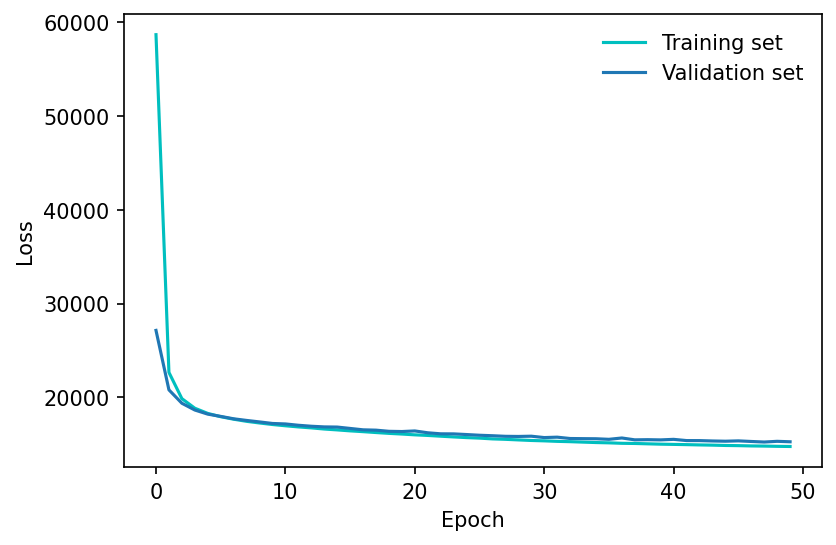

In [56]:
plt.plot (history.history['loss'], color = "c", label='Training set')
plt.plot (history.history['val_loss'], color ='tab:blue', label = "Validation set")
plt.xlabel ("Epoch"); plt.ylabel ("Loss")
plt.legend(frameon=False)
plt.show()

In [57]:
model.evaluate(X_test_pp, y_test)

8271/8271 [==============================] - 11s 1ms/step - loss: 15256.7539 - mse: 15256.7539


[15256.75390625, 15256.75390625]

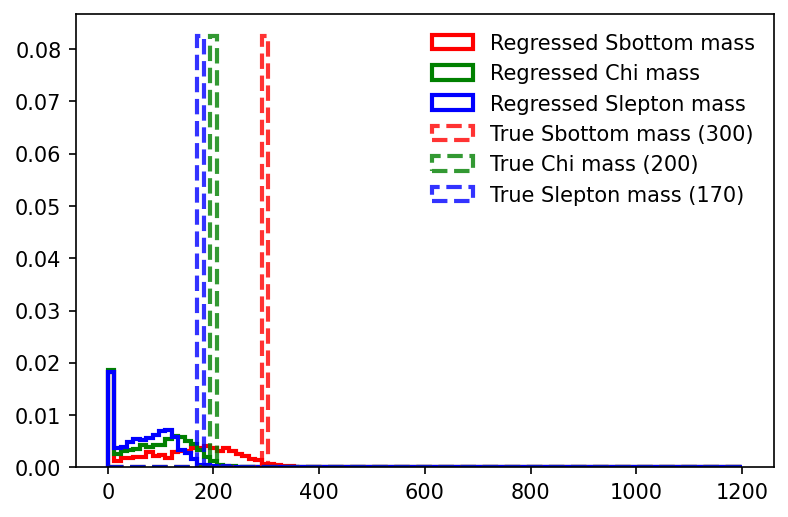

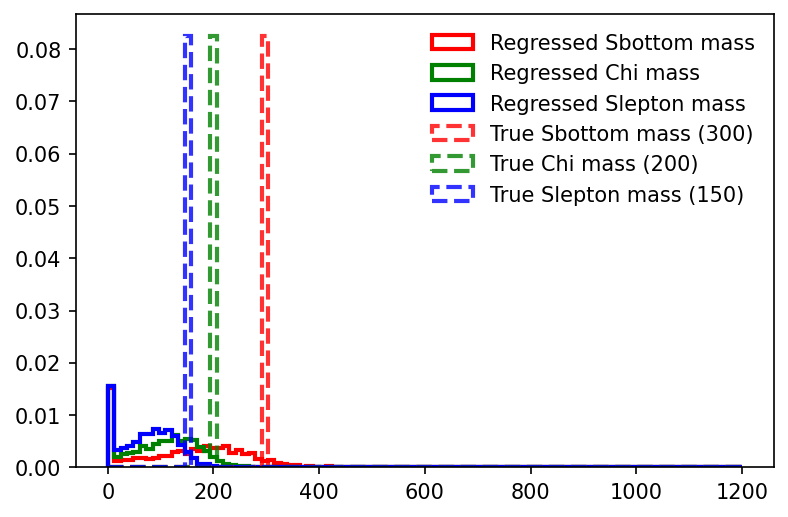

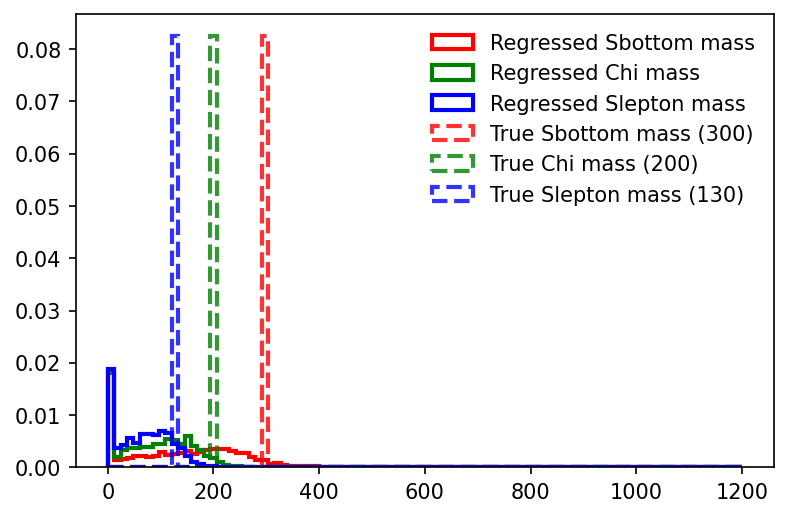

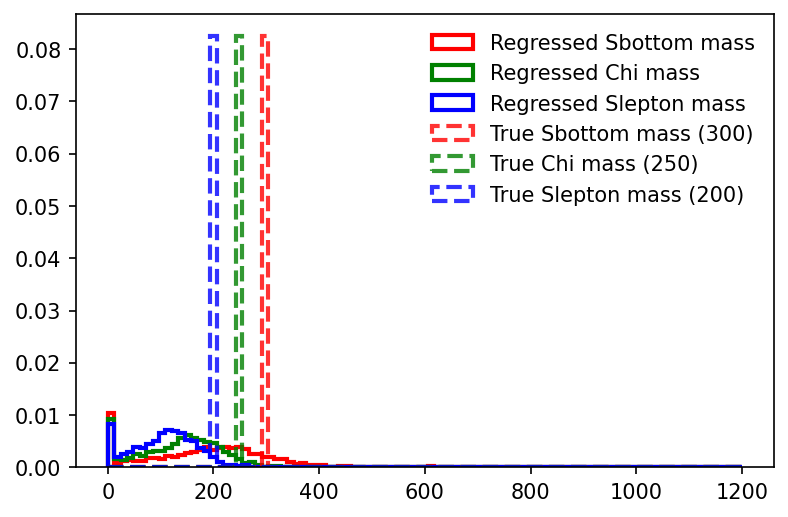

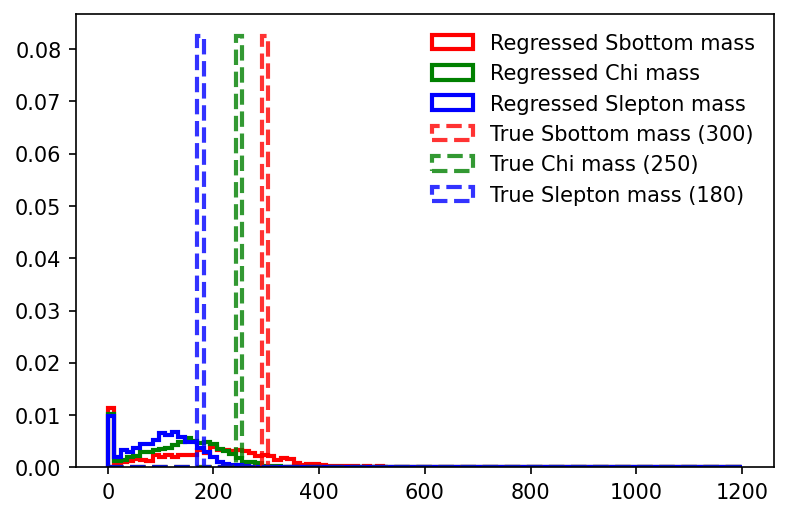

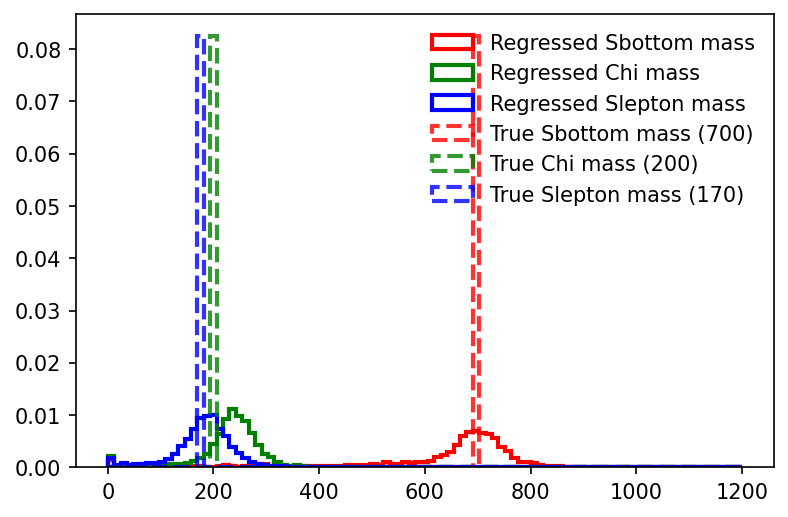

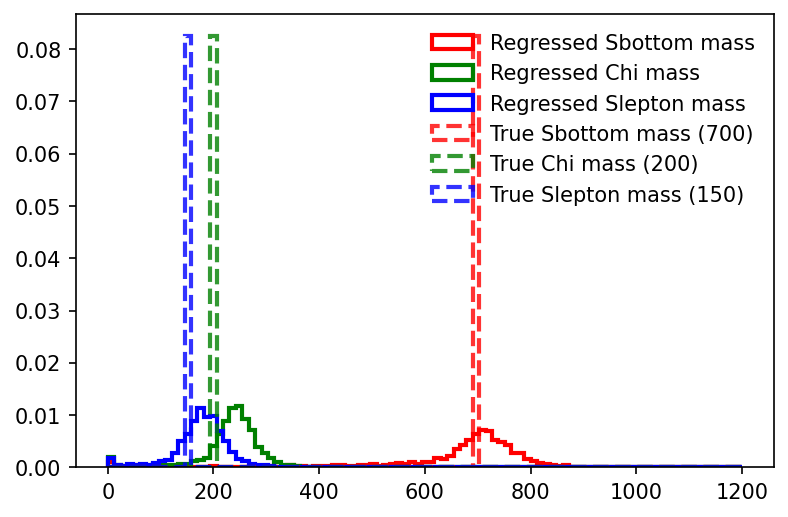

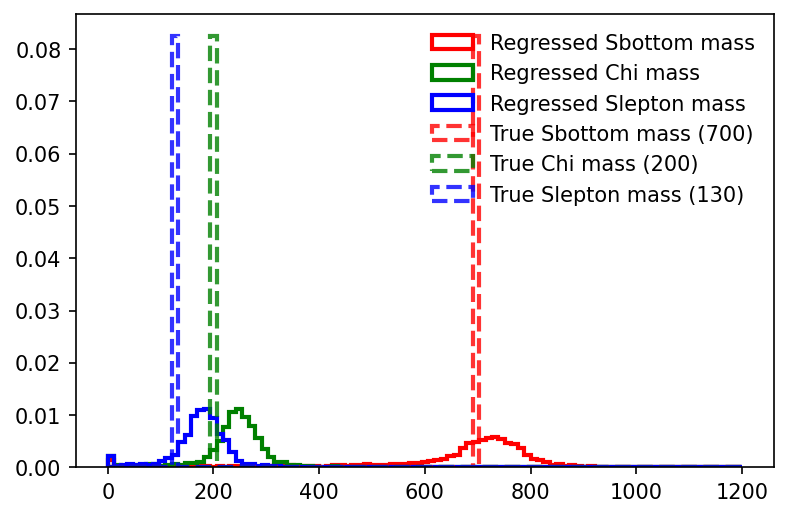

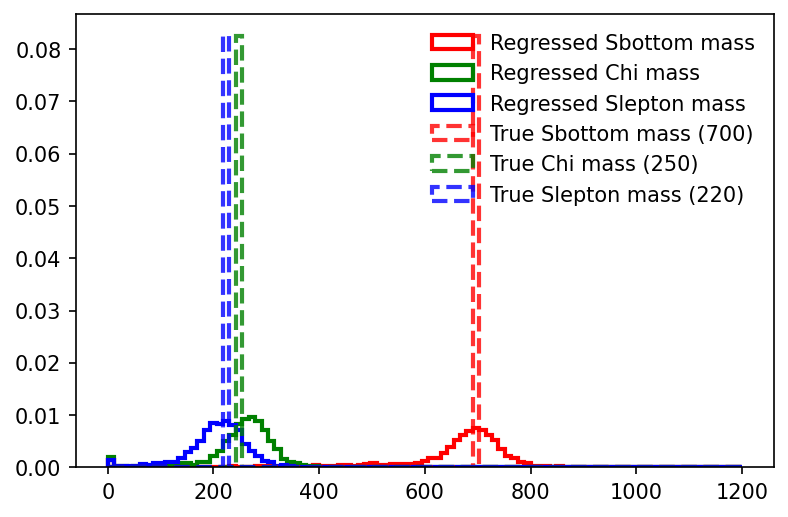

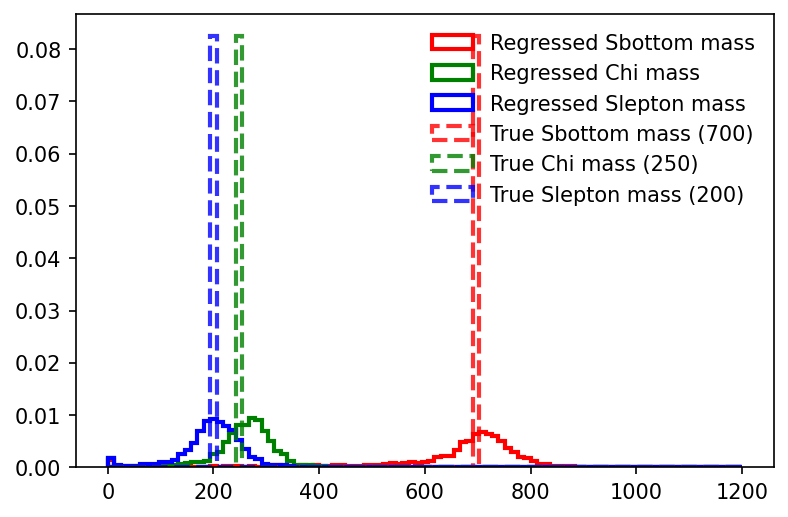

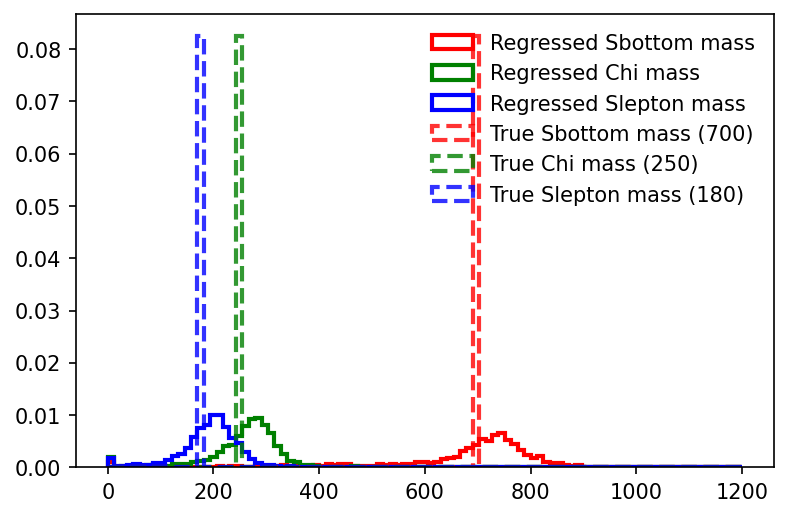

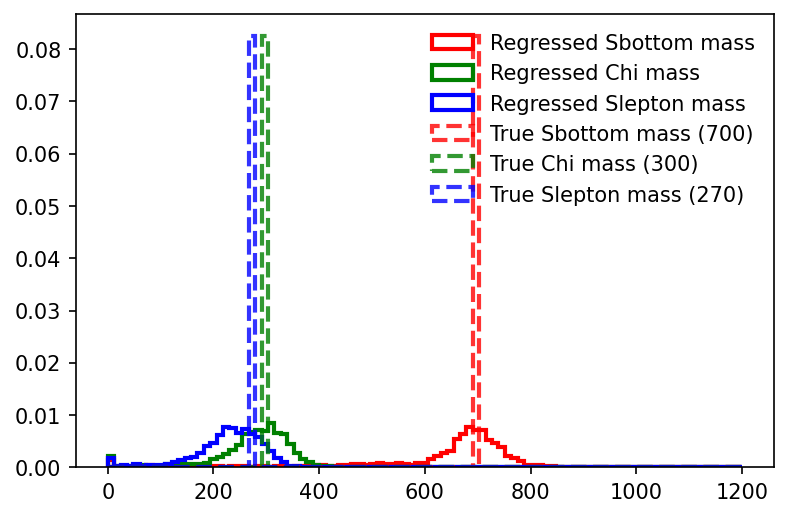

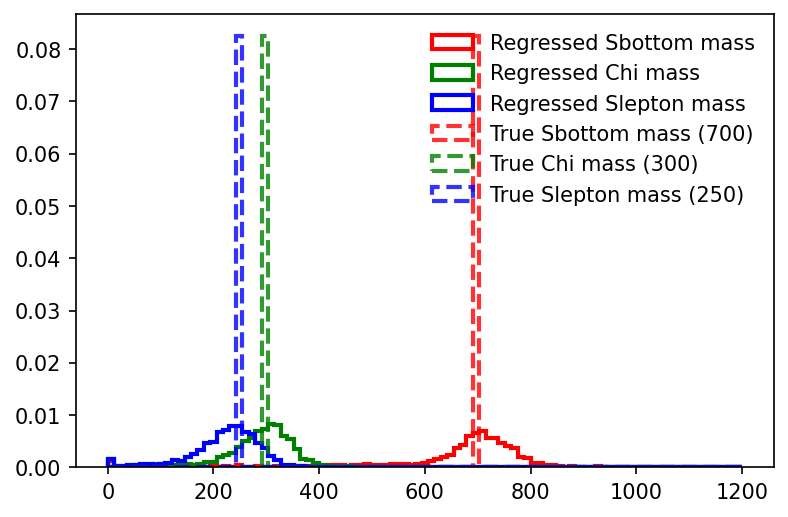

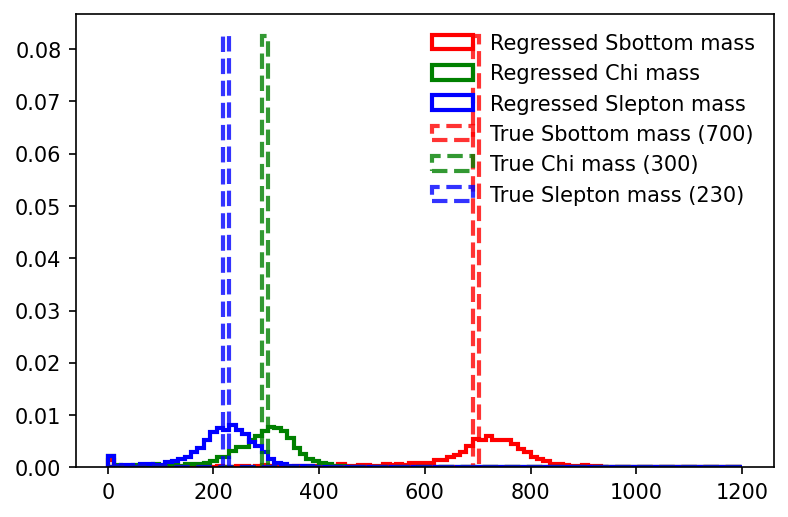

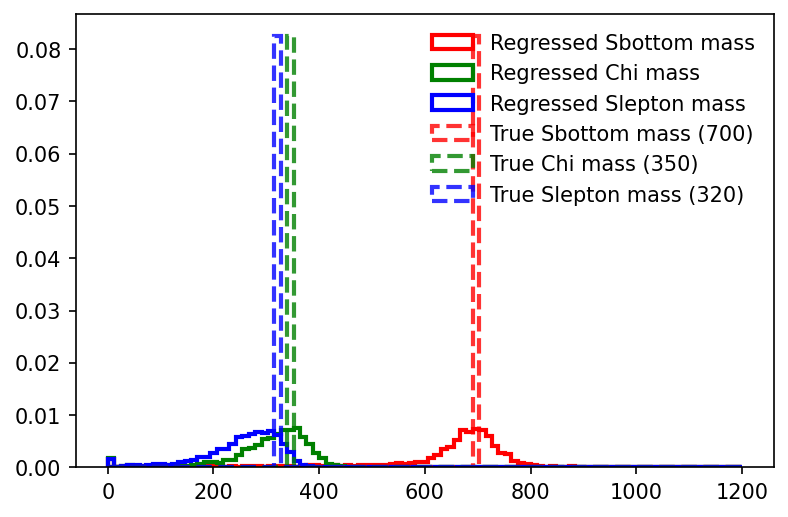

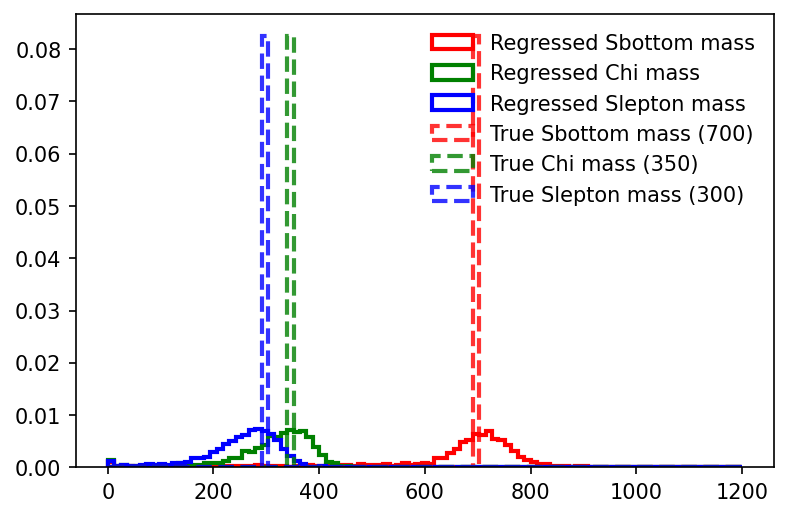

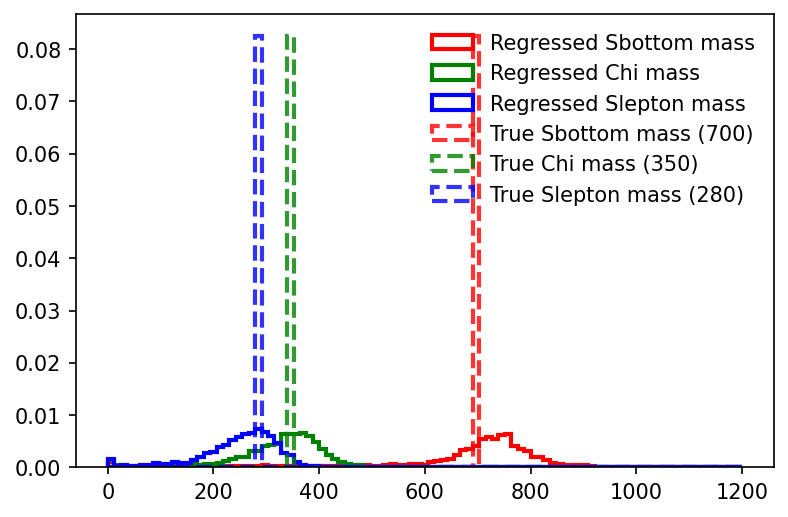

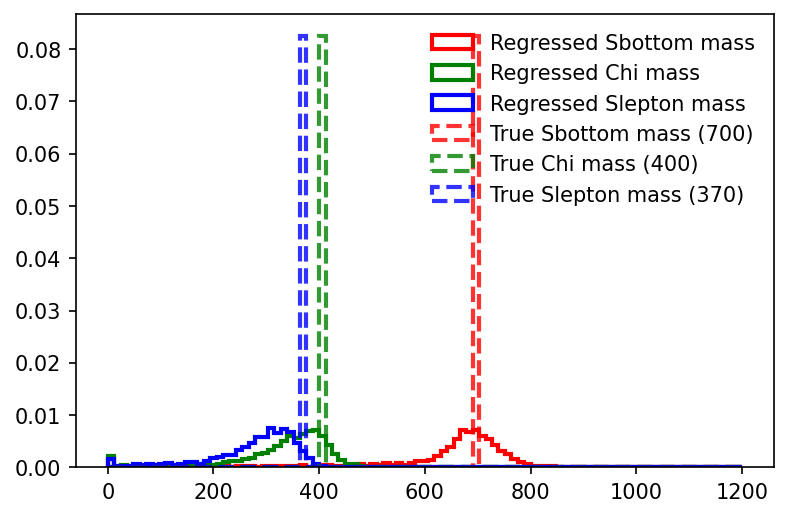

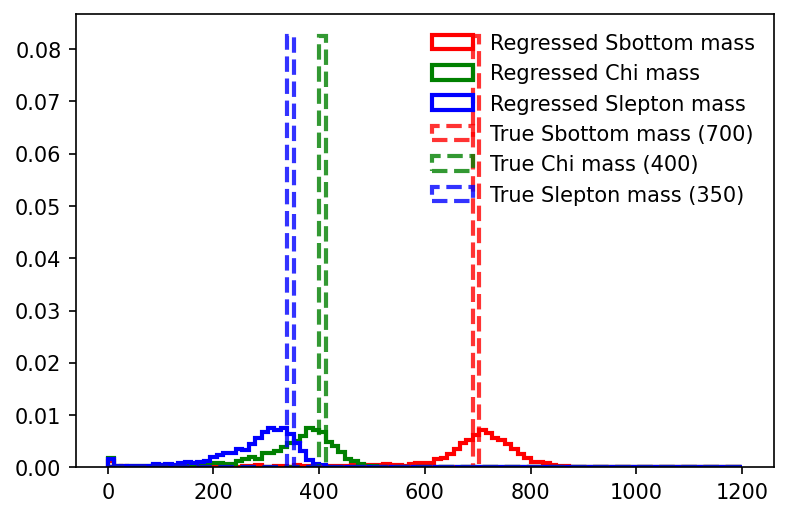

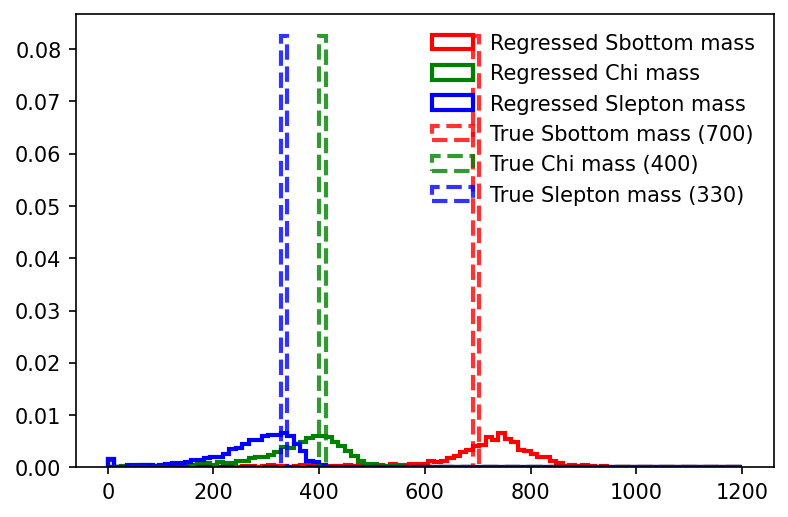

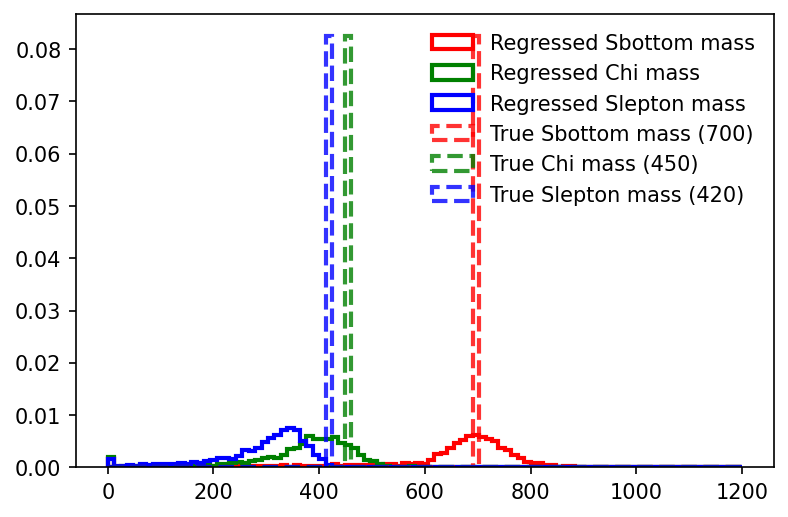

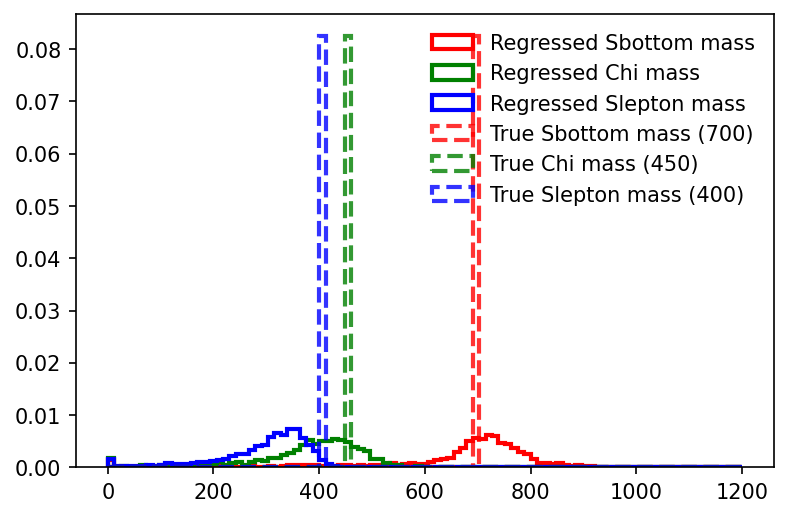

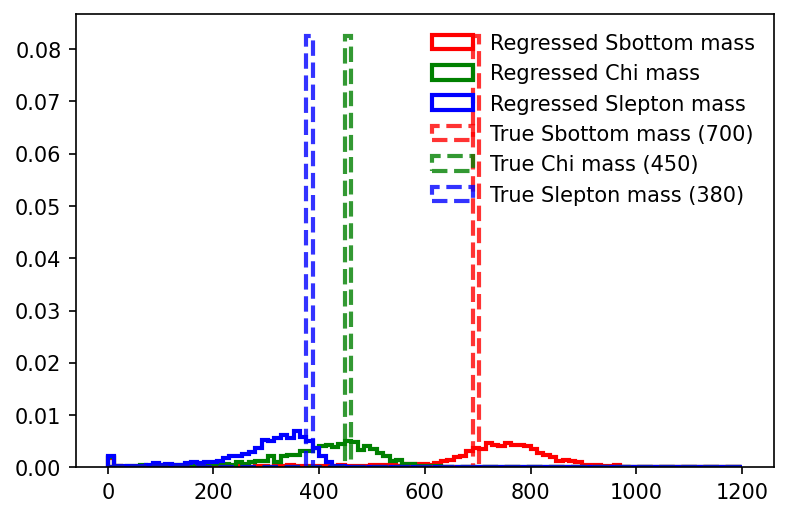

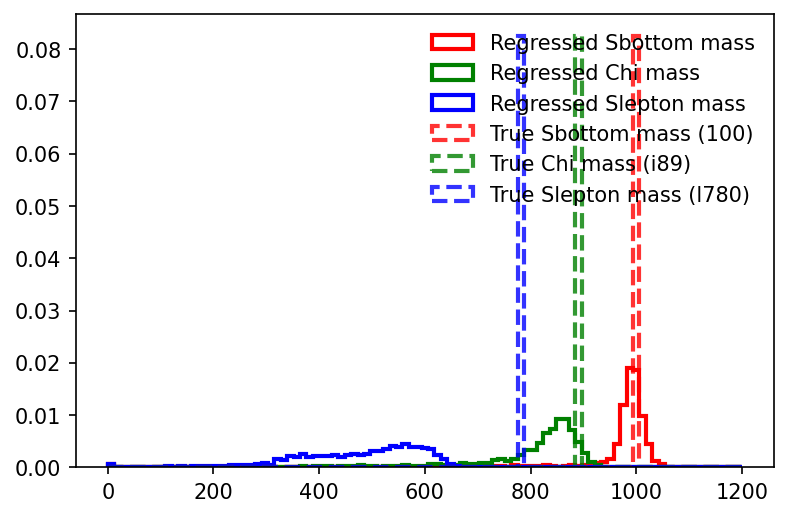

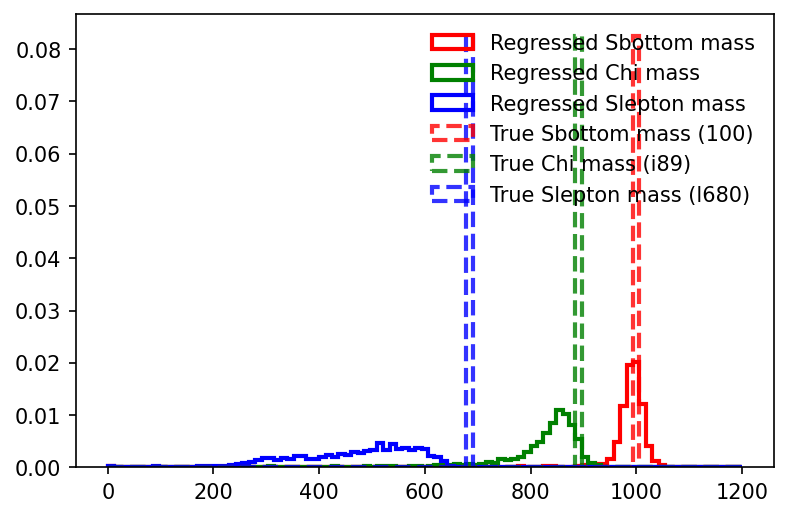

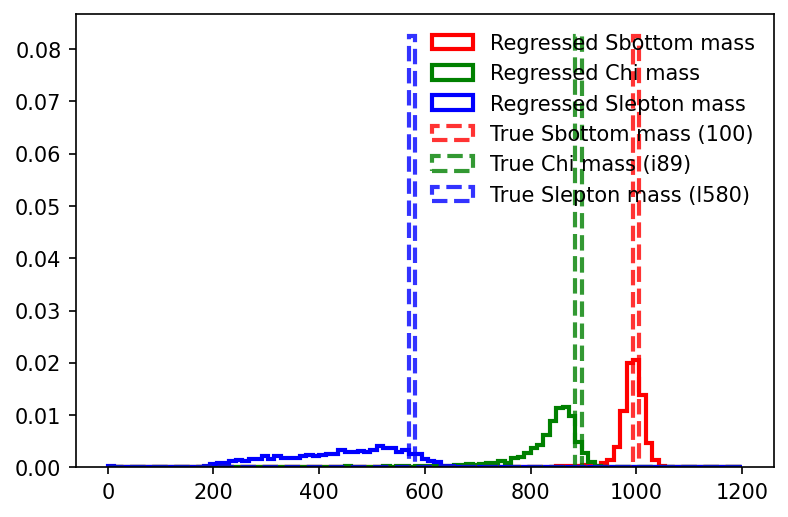

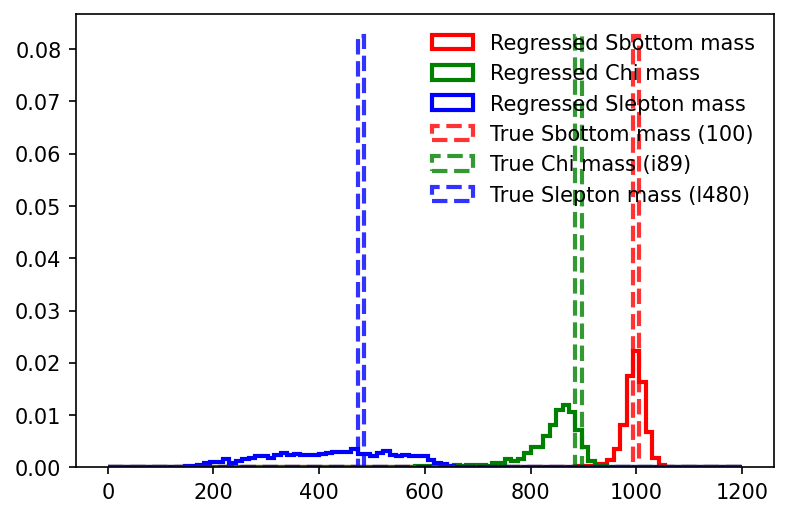

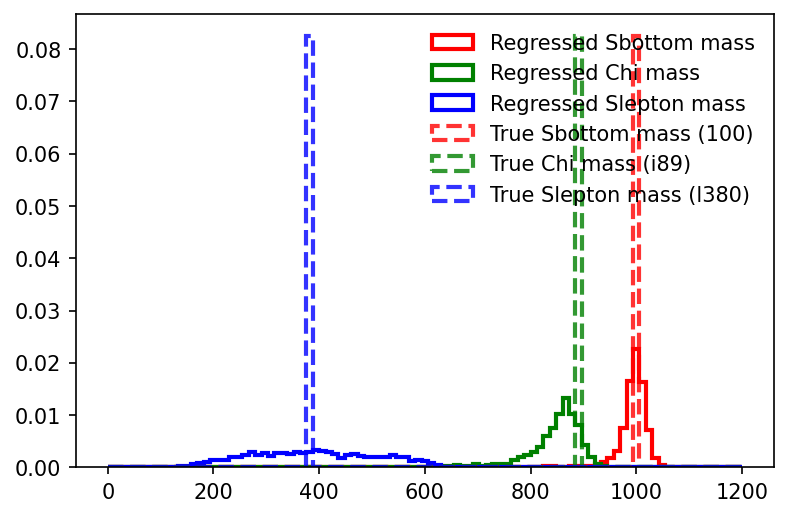

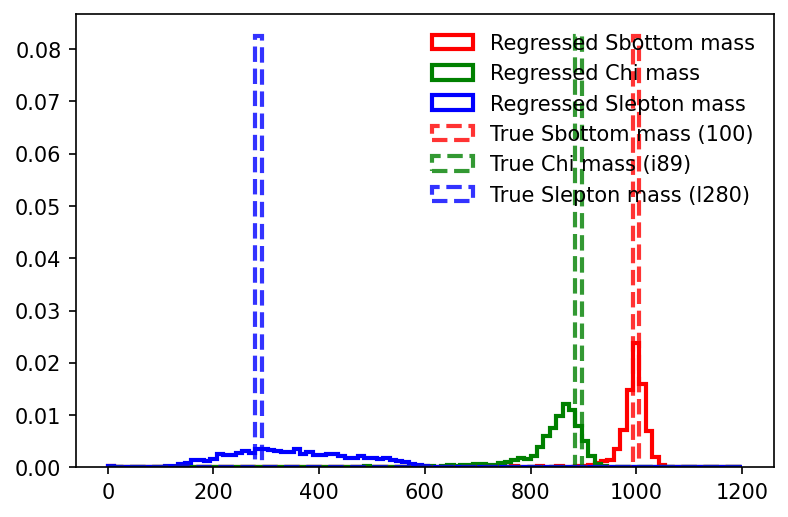

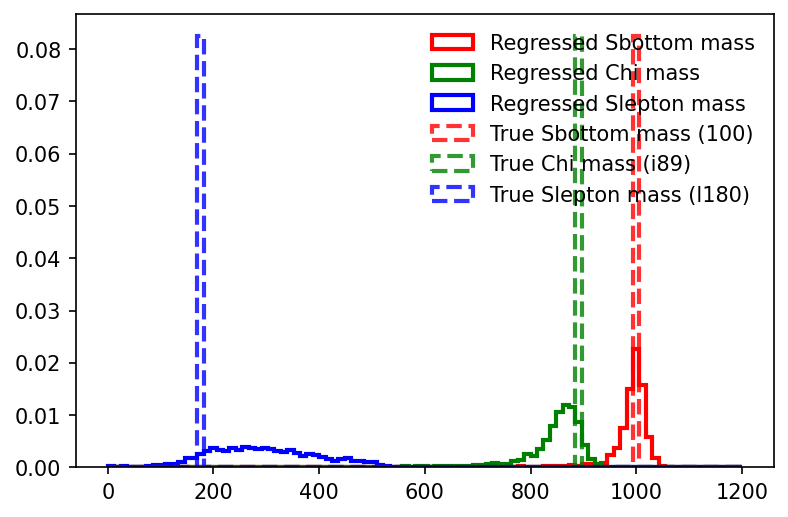

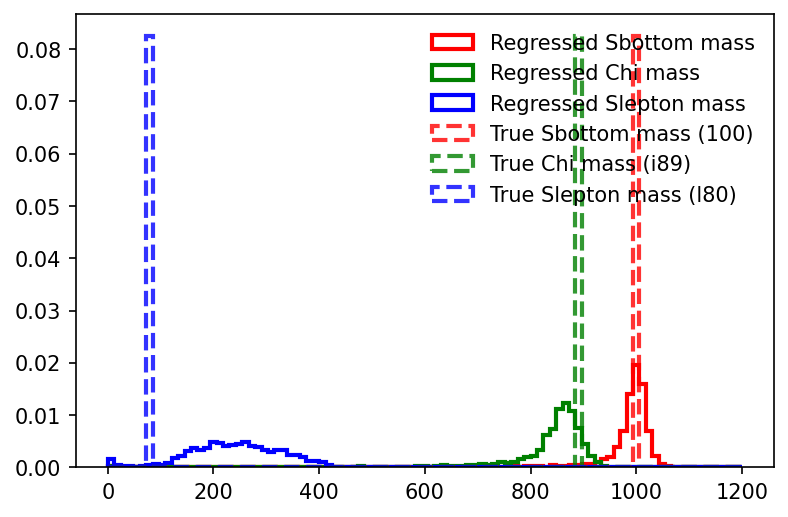

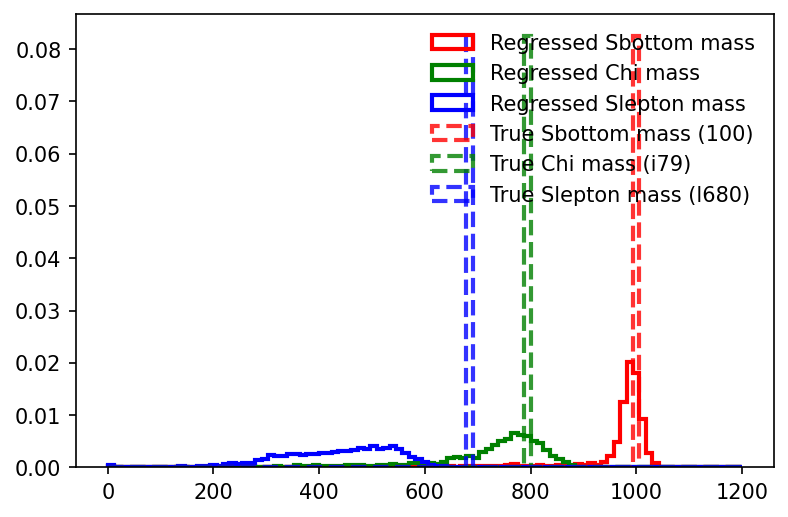

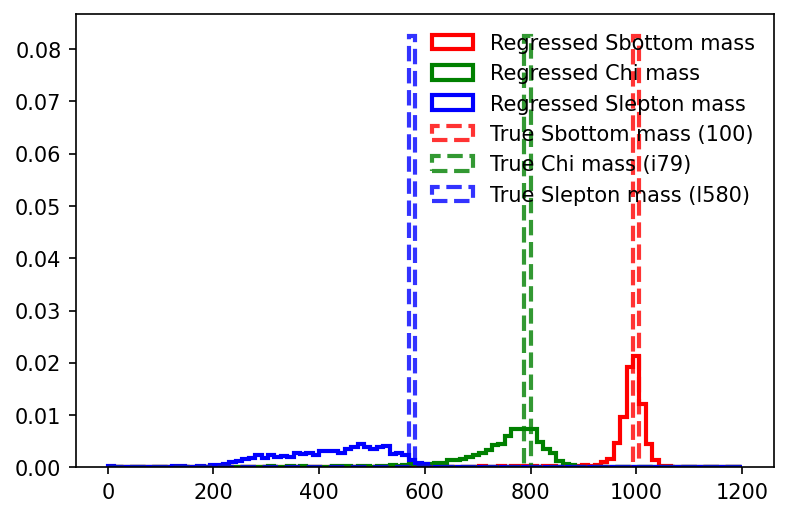

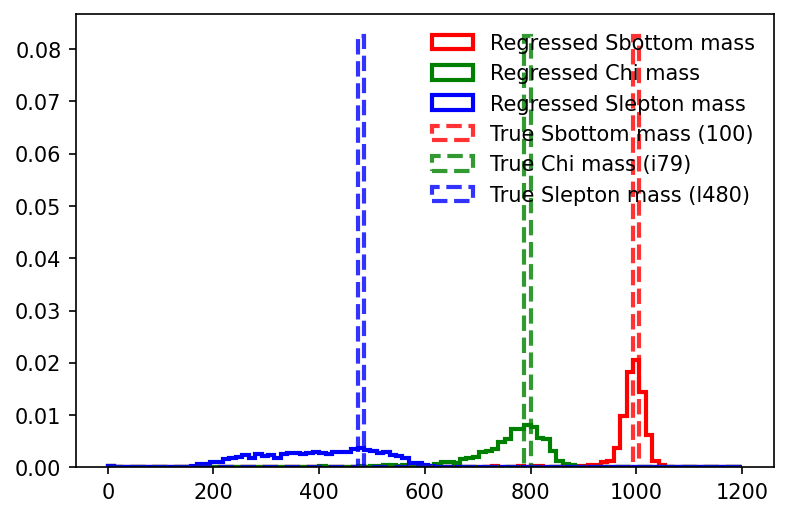

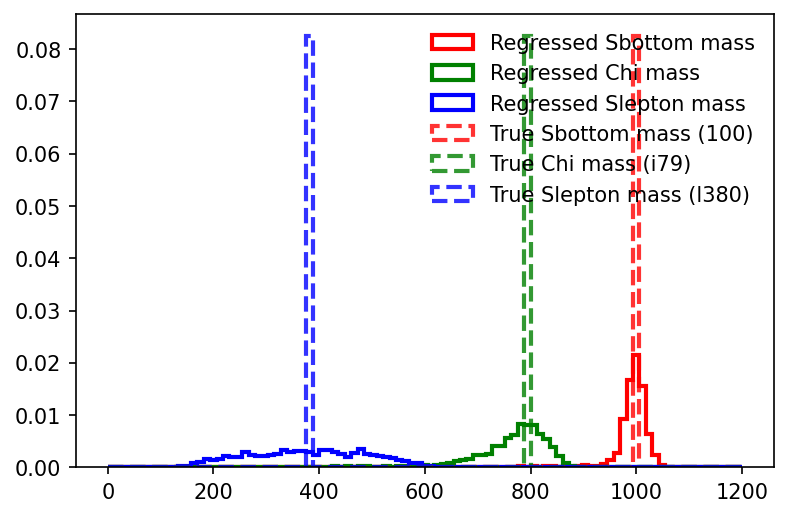

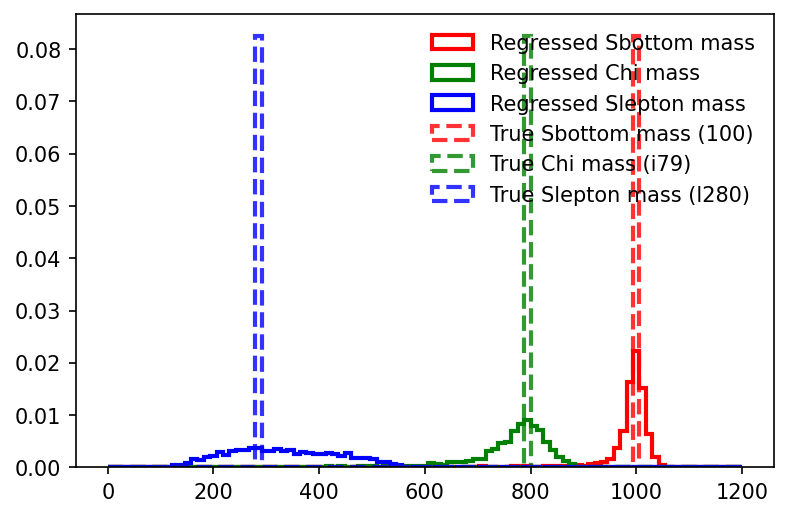

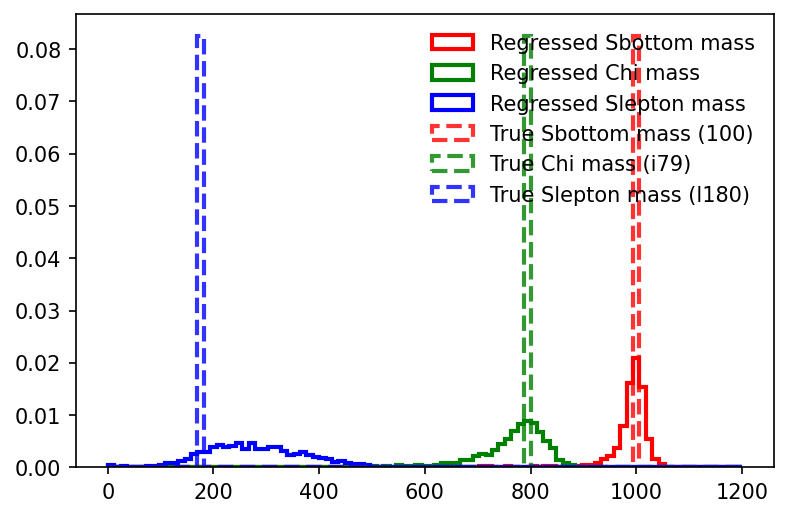

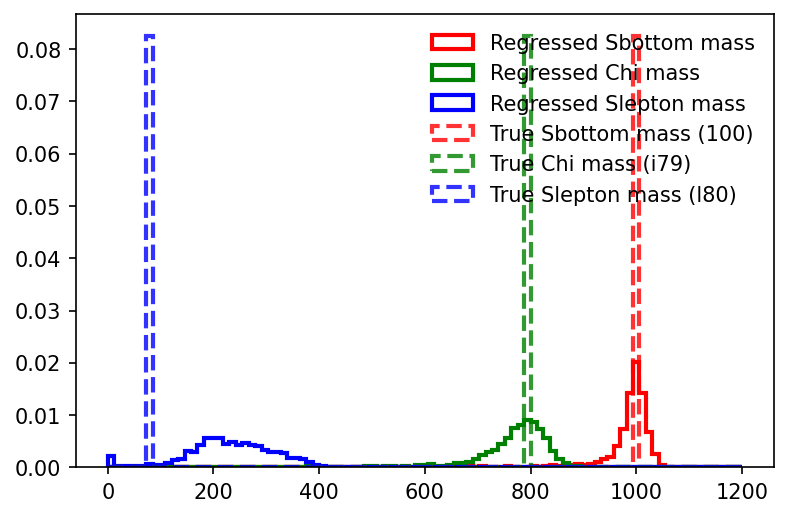

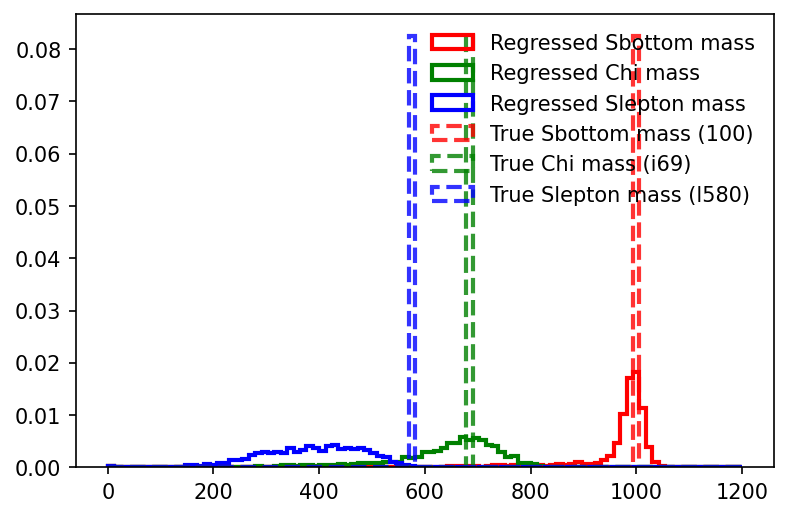

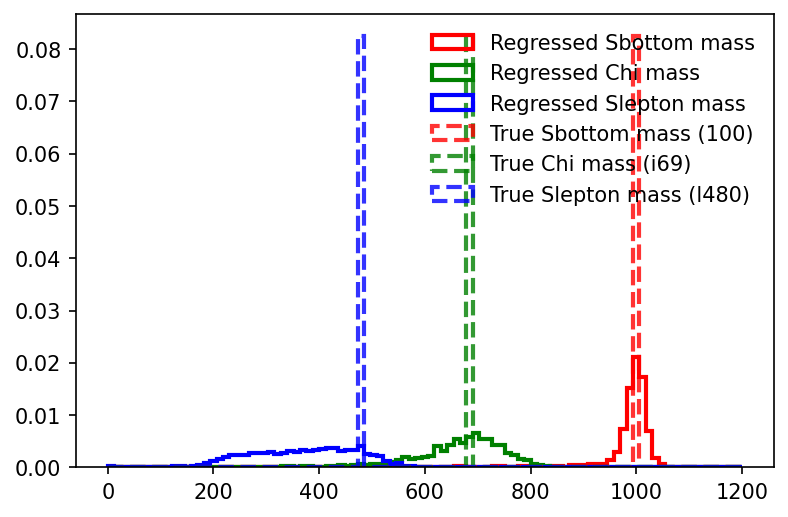

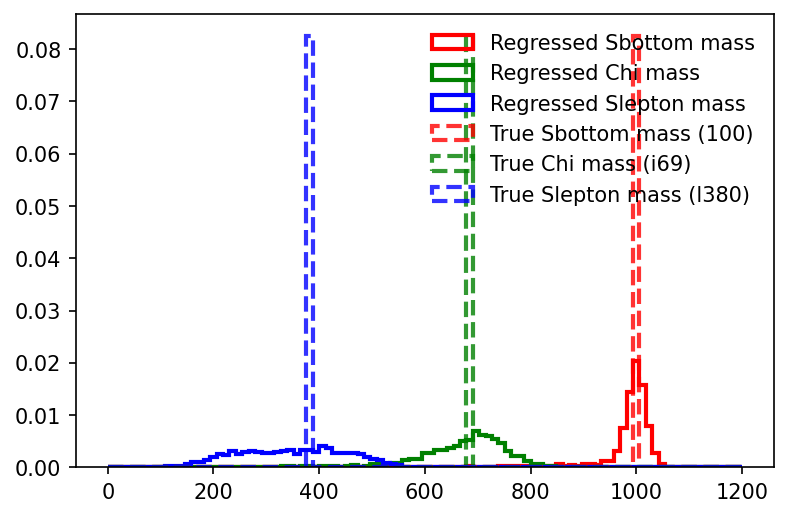

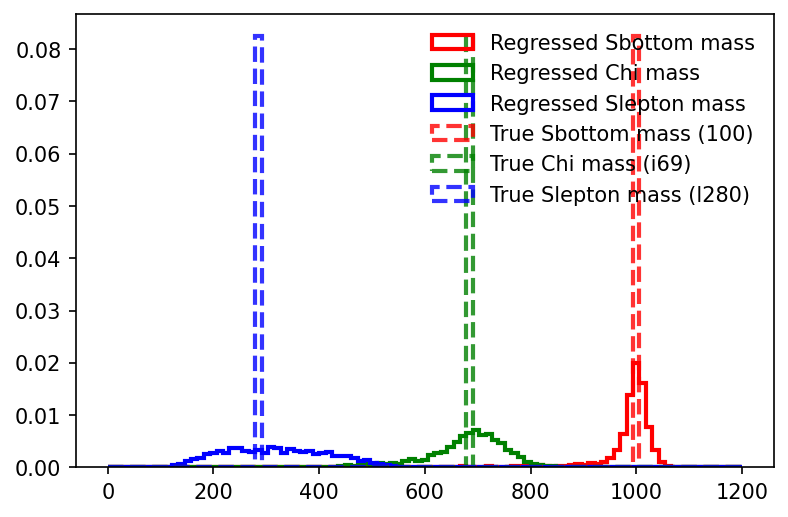

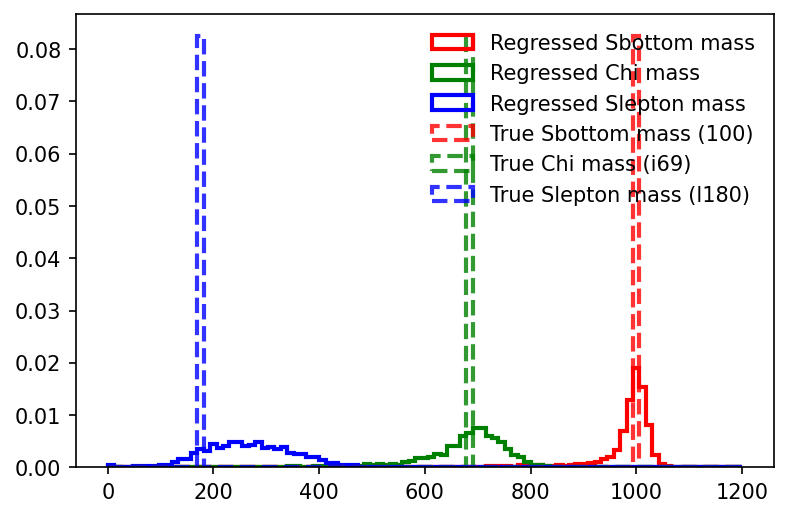

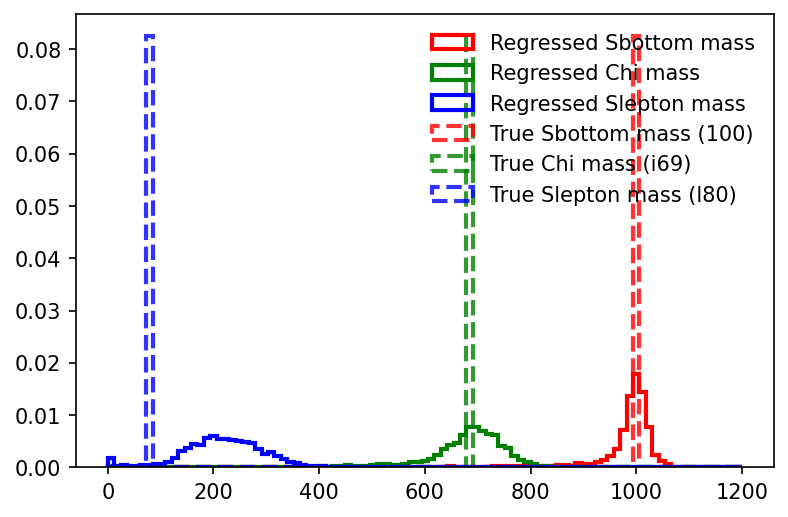

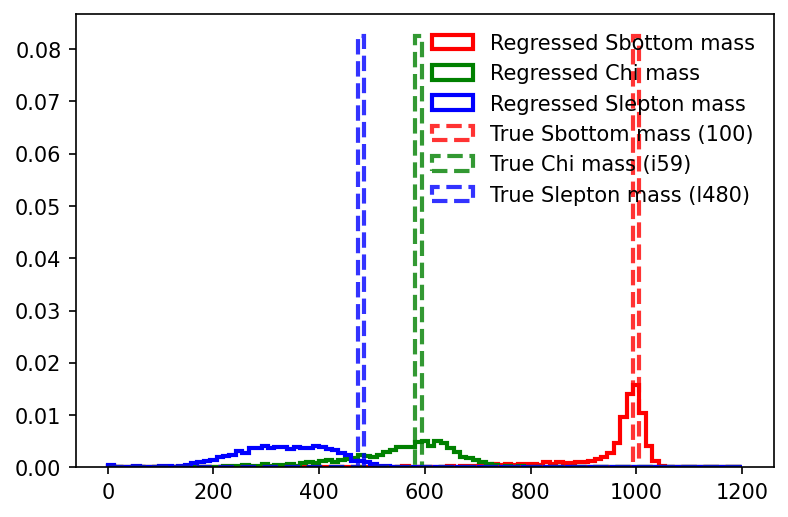

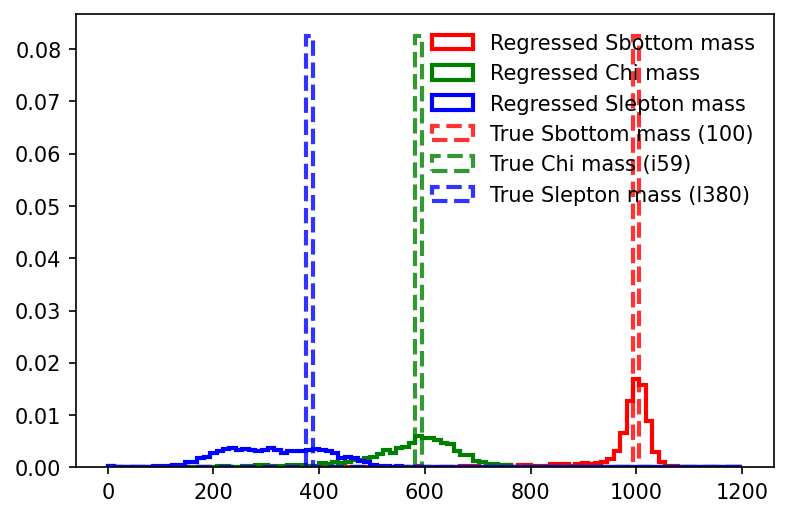

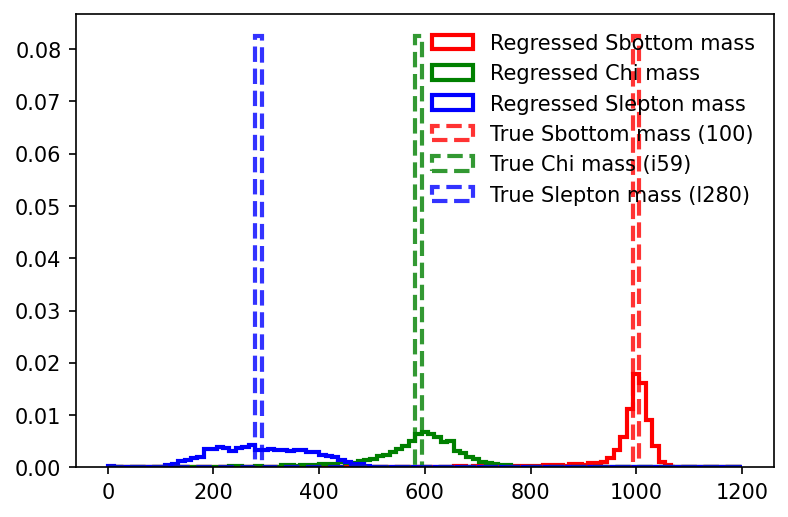

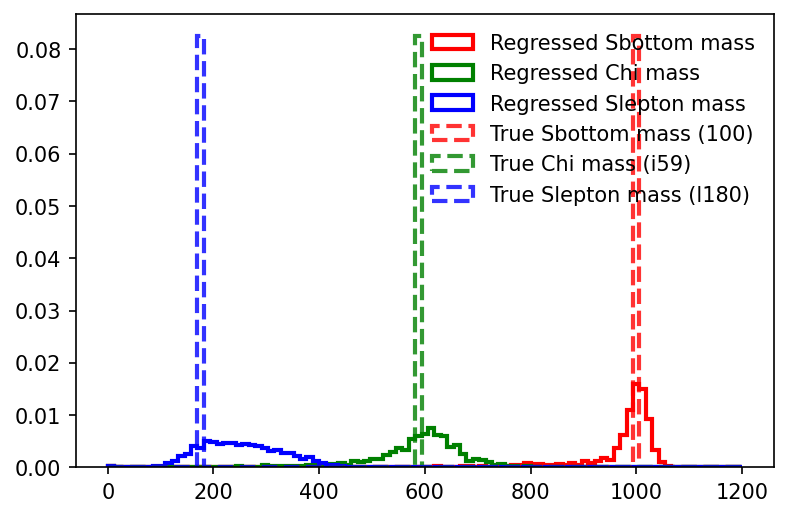

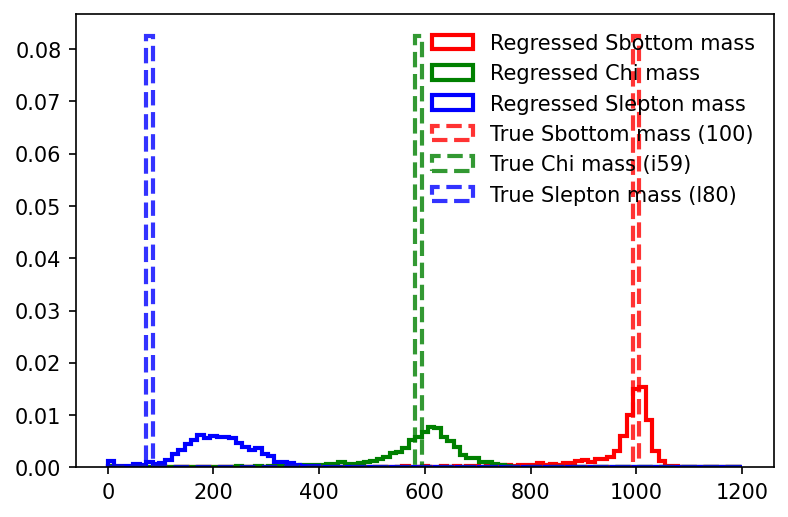

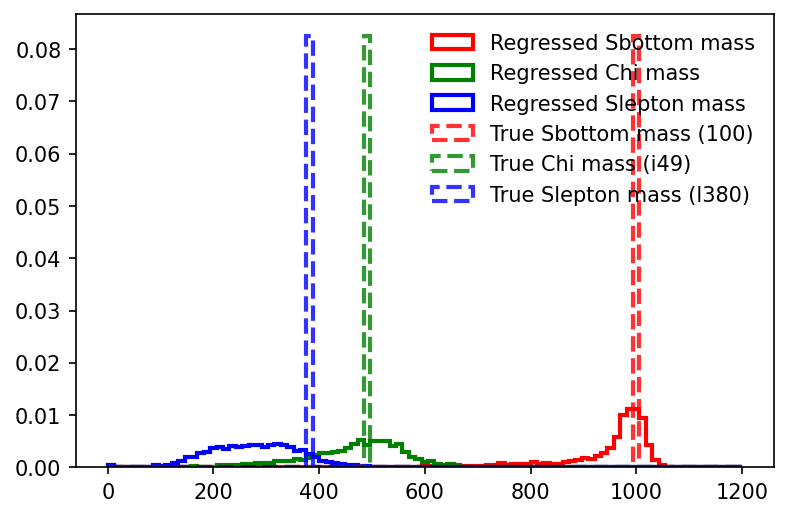

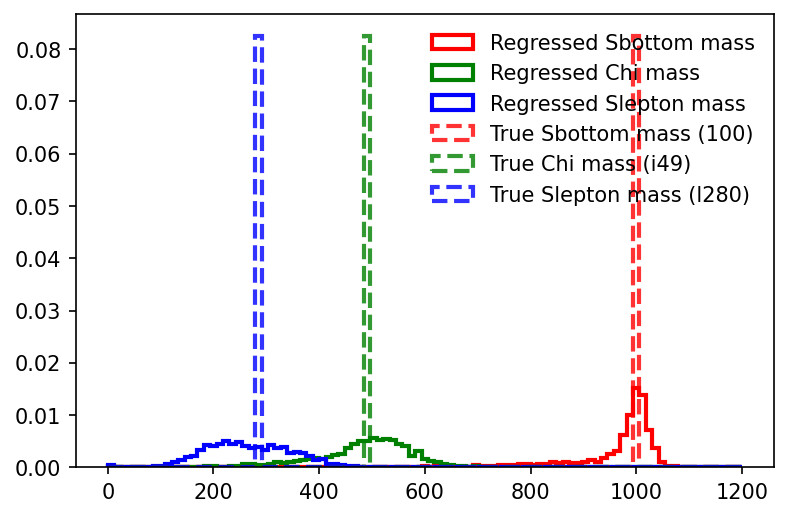

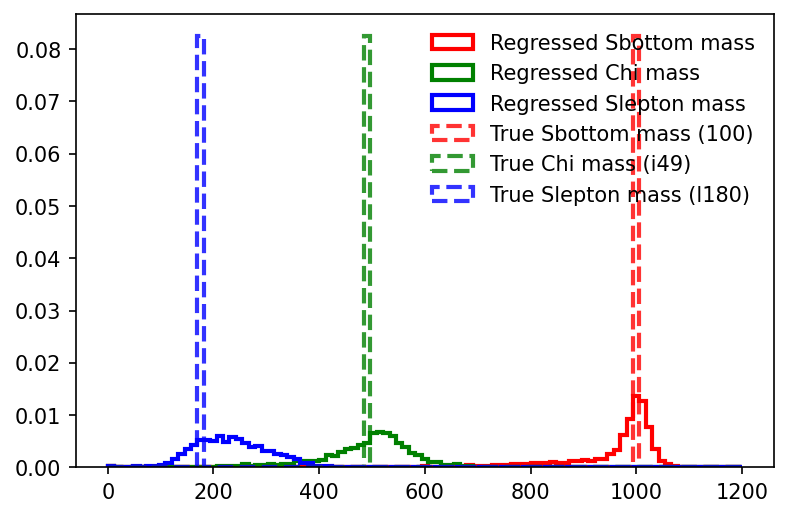

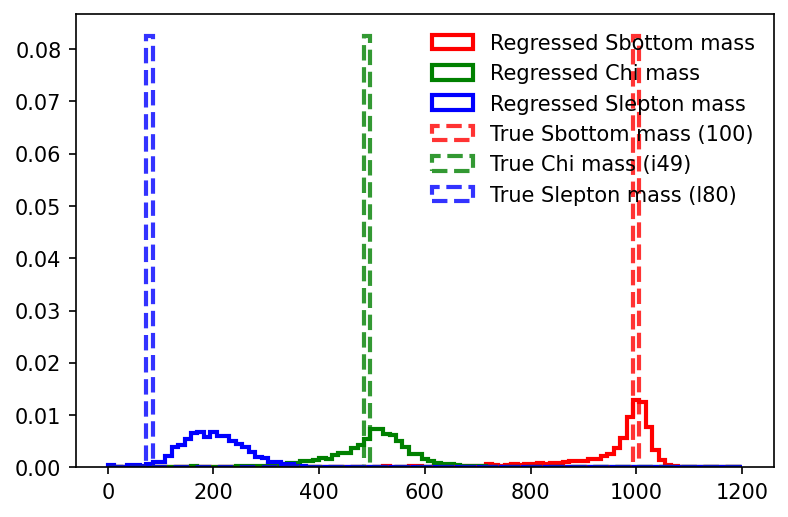

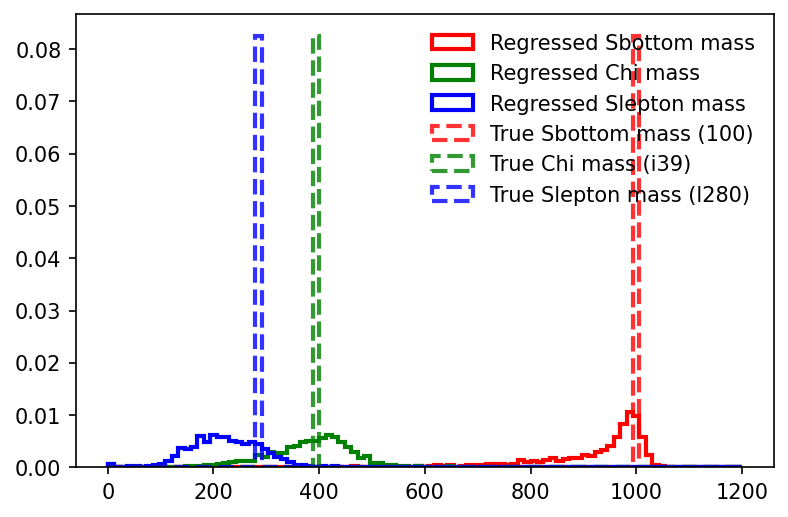

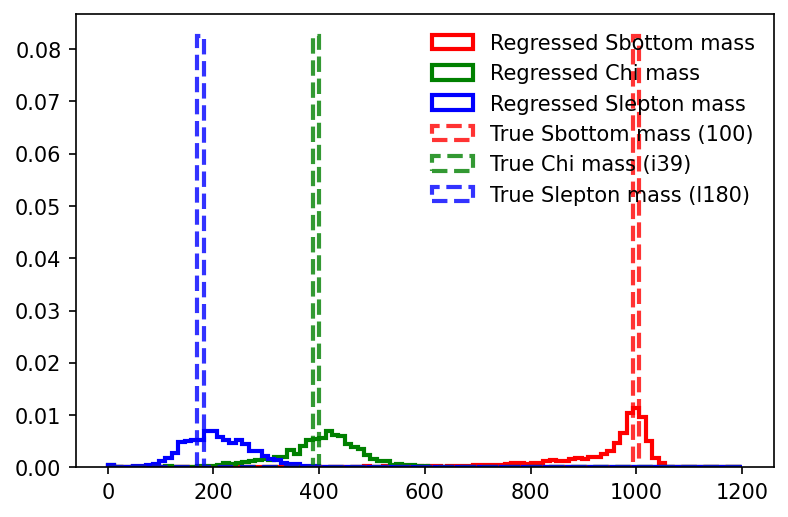

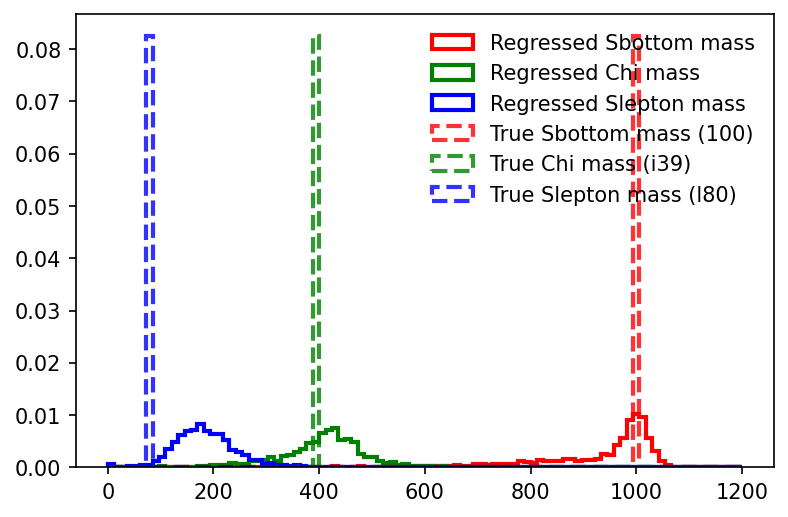

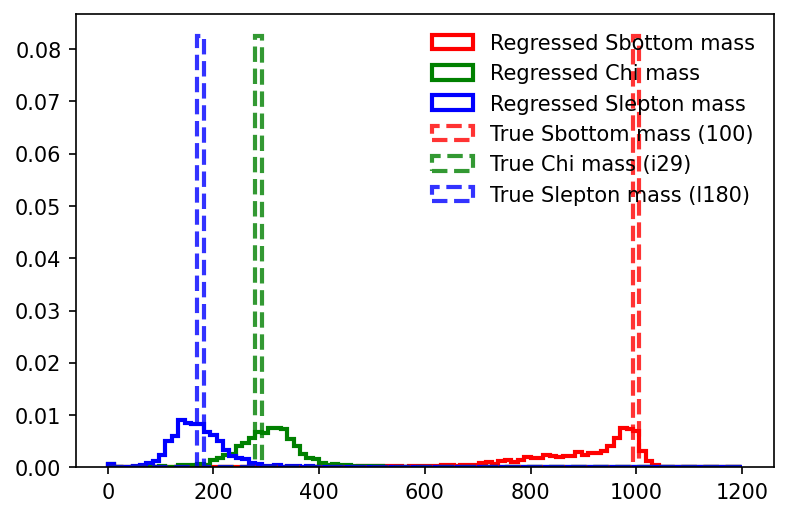

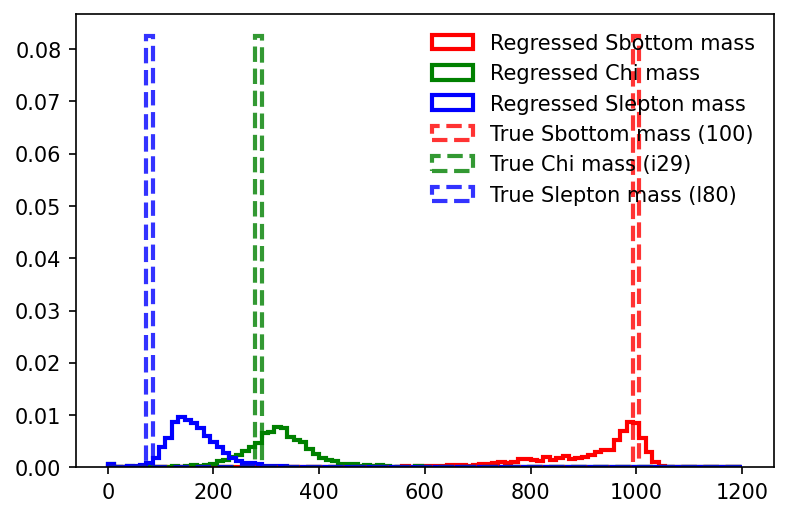

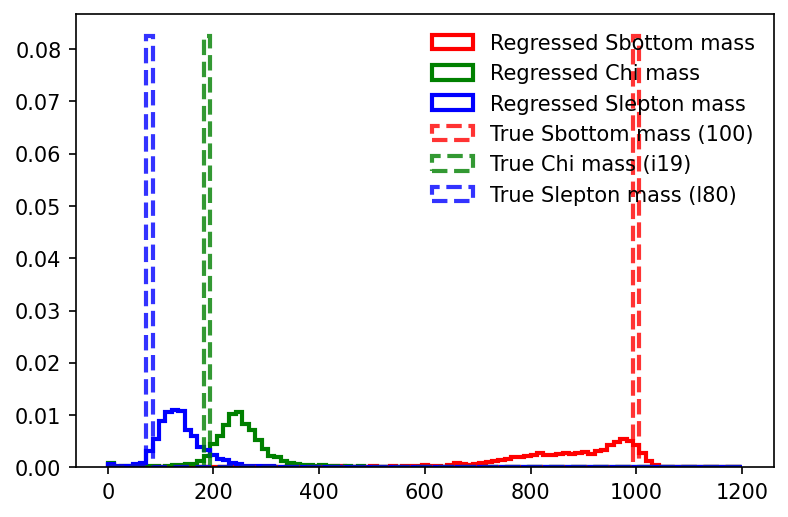

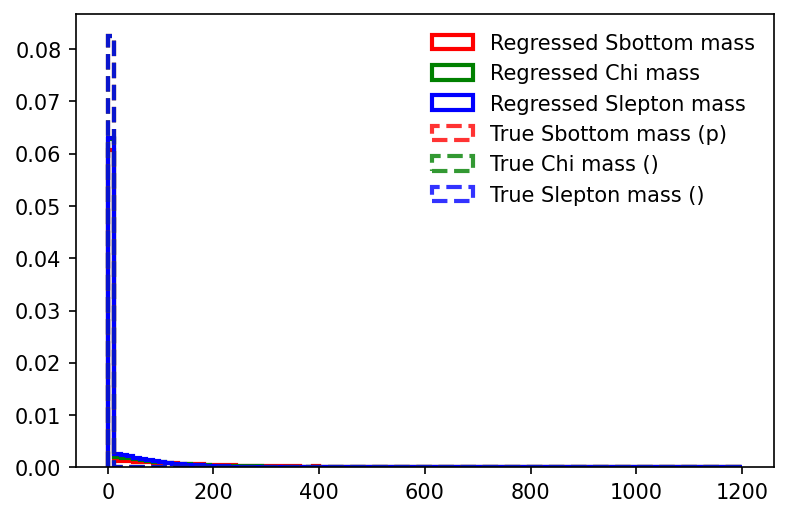

In [58]:
for s in sample_list:
        sb_mass = s[2:5]
        chi_mass = s[9:12]
        slep_mass = s[15:]
        masses = model.predict(X_test_pp[df_test[s]==1])
        true_masses = y_test[df_test[s]==1]
        axis=np.linspace(0,1200,100)
        plt.hist(masses[:,0], bins = axis, label = 'Regressed Sbottom mass', histtype='step', color='r', density=True, linewidth=2 )
        plt.hist(masses[:,1], bins = axis, label = 'Regressed Chi mass',  histtype='step', color='g',  density=True, linewidth=2 )
        plt.hist(masses[:,2], bins = axis, label = 'Regressed Slepton mass',  histtype='step', color='b',  density=True, linewidth=2 )
        plt.hist(true_masses['GEN_pole_msb'], bins = axis, label = 'True Sbottom mass ('+str(sb_mass)+')', linestyle='dashed', histtype='step', color='r',  density=True, linewidth=2, alpha=0.8 )
        plt.hist(true_masses['GEN_pole_mchi'], bins = axis, label = 'True Chi mass ('+str(chi_mass)+')', linestyle='dashed', histtype='step', color='g',  density=True, linewidth=2, alpha=0.8 )
        plt.hist(true_masses['GEN_pole_mslep'], bins = axis, label = 'True Slepton mass ('+str(slep_mass)+')', linestyle='dashed', histtype='step', color='b',  density=True, linewidth=2, alpha=0.8 )
        plt.legend(frameon=False)
        plt.show()

In [59]:
df_top = uproot.open("plots_RPV_top.root:hww2l2v_13TeV_incl/testtree/tree_top").arrays(library="pd")
df_top = shuffle(df_top,n_samples=100000, random_state = 42)
X_top = input_scaler.transform(df_top[features])
masses_top = model.predict(X_top)

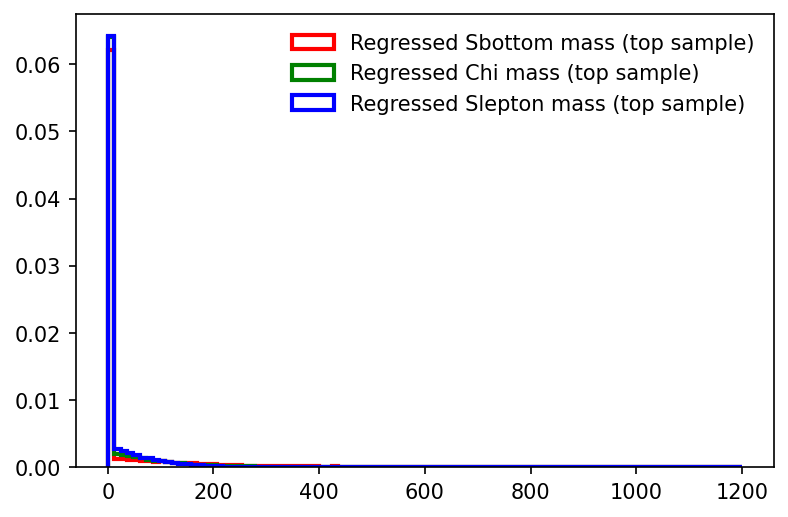

In [60]:
axis=np.linspace(0,1200,100)

plt.hist(masses_top[:,0], bins = axis, label = 'Regressed Sbottom mass (top sample)', histtype='step', color='r', density=True, linewidth=2 )
plt.hist(masses_top[:,1], bins = axis, label = 'Regressed Chi mass (top sample)',  histtype='step', color='g',  density=True, linewidth=2 )
plt.hist(masses_top[:,2], bins = axis, label = 'Regressed Slepton mass (top sample)',  histtype='step', color='b',  density=True, linewidth=2 )
plt.legend(frameon=False)
plt.show()

In [16]:
print(input_scaler.mean_)
print(np.sqrt(input_scaler.var_))

[ 8.57826128e-03  1.45113414e-03  5.42844584e-03 -7.37312905e-03
  1.73301715e+02  4.17465095e+01  6.23967586e-03  7.07893619e-03
 -9.34638188e-03  2.10188036e-03  1.41014482e+02  4.90571385e+01
  6.09279690e-03  1.30688845e+02 -1.47976454e+03  7.36644550e-01
  1.53976721e+00  2.25448714e+00  2.10542188e+00  1.30110766e+00
  2.33095399e+00  1.94956652e+00  1.28450479e+00  1.98346428e+00
  1.55088622e+00  1.65618783e+00  1.62270835e+00  5.35138931e+02
  1.59526973e+02  1.27163956e+02  3.10791867e+02 -1.48111752e+03
 -1.22439016e+03  1.07091338e+02  7.96301822e+01  2.03536122e+02
  1.95746972e+02  9.17181026e+01  1.81686750e+02  9.58987982e+01
  1.01977976e+02  1.61590995e+02]
[1.20975116e+00 2.31195894e+00 1.81642895e+00 1.67060452e+00
 9.78022499e+01 4.98930089e+01 1.11257352e+00 1.13462803e+00
 1.81773605e+00 1.81494073e+00 6.96203796e+01 2.48518514e+01
 1.81431213e+00 7.10225575e+01 3.55309038e+03 5.63827554e-01
 9.19580616e-01 7.66327707e-01 8.09516598e-01 8.57433623e-01
 7.31994419

In [17]:

with open('model_rpv_mass_regression.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(model.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_digit (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(model.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()           
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in input_scaler.mean_]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in np.sqrt(input_scaler.var_)]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(model.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(model.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_{iLayer_tmp}(buffer_out[c], norma);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma = 0;

            for(c=0;c<{n_out};++c)
              norma+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_{iLayer_tmp}(buffer_out[c], norma);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = model.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //ggh
        return buffer_in[1];
      else if (flag==2)  //bkg
        return buffer_in[2];
   
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
